In [58]:
import pandas as pd
import seaborn as sns
import matplotlib

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

## Read in Spillover ICTV 2015 Classifications

In [59]:
spilloverdb = 'Spillover_dataset_Sept_22_2020.csv'
sp = pd.read_csv(spilloverdb)
sp.head()

/var/folders/pv/_f7m99kd33782sdc79lfqc300000gn/T/ipykernel_1947/3489051028.py:2: DtypeWarning:

Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.



,Column1,IndividualID,HostClass,HostOrder,HostFamily,HostGenus,HostSpecies,Virus,VirusSpecies,VirusGenus,...,WilsonNoDiets,ConservationStatus,TaxaGroup,HostGeography,LUS_new,LVSTD_DS,ResultPopDensity,PresenceDeforestation20,ProbUrbanExpan2030Cat,AgChangePA
0,1,NCB146845,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,2,NCB146846,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,3,NCB146847,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,4,NCB146848,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,5,NCB146849,Mammalia,Rodentia,Cricetidae,Oligoryzomys,Oligoryzomys longicaudatus,Andes virus,Andes hantavirus,Hantavirus,...,3,LC,Terrestrial mammal,Regional,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [84]:
rename_cols = {'VirusFamily': 'family', 
               'VirusGenus':'genus', 
               'VirusSpecies': 'species'}

select_cols = ['AccessionNumber', 'family', 'genus', 'species']

sp.rename(columns=rename_cols, inplace=True)
taxD = sp[select_cols]
taxD.head()

,AccessionNumber,family,genus,species
0,EU241637,Bunyaviridae,Hantavirus,Andes hantavirus
1,EU241638,Bunyaviridae,Hantavirus,Andes hantavirus
2,EU241639,Bunyaviridae,Hantavirus,Andes hantavirus
3,EU241640,Bunyaviridae,Hantavirus,Andes hantavirus
4,EU241641,Bunyaviridae,Hantavirus,Andes hantavirus


In [80]:
tax_ranks = [ # superkingdom
        'realm', 'subrealm', 'kingdom',
        'subkingdom', 'phylum', 'subphylum', 'class', 'subclass', 'order',
        'suborder', 'family', 'subfamily', 'genus', 'subgenus', 'species'
    ]

In [87]:
taxD['lineage'] = ';;;;;;;;;;' + taxD['family'] + ';;' + taxD['genus'] + ';;' + taxD['species']
taxD['fgs'] =  taxD['family'] + ';' + taxD['genus'] + ';' + taxD['species']

/var/folders/pv/_f7m99kd33782sdc79lfqc300000gn/T/ipykernel_1947/80378266.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pv/_f7m99kd33782sdc79lfqc300000gn/T/ipykernel_1947/80378266.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
taxD.head()

,AccessionNumber,family,genus,species,lineage,fgs
0,EU241637,Bunyaviridae,Hantavirus,Andes hantavirus,;;;;;;;;;;Bunyaviridae;;Hantavirus;;Andes hant...,Bunyaviridae;Hantavirus;Andes hantavirus
1,EU241638,Bunyaviridae,Hantavirus,Andes hantavirus,;;;;;;;;;;Bunyaviridae;;Hantavirus;;Andes hant...,Bunyaviridae;Hantavirus;Andes hantavirus
2,EU241639,Bunyaviridae,Hantavirus,Andes hantavirus,;;;;;;;;;;Bunyaviridae;;Hantavirus;;Andes hant...,Bunyaviridae;Hantavirus;Andes hantavirus
3,EU241640,Bunyaviridae,Hantavirus,Andes hantavirus,;;;;;;;;;;Bunyaviridae;;Hantavirus;;Andes hant...,Bunyaviridae;Hantavirus;Andes hantavirus
4,EU241641,Bunyaviridae,Hantavirus,Andes hantavirus,;;;;;;;;;;Bunyaviridae;;Hantavirus;;Andes hant...,Bunyaviridae;Hantavirus;Andes hantavirus


In [74]:
# Counting unique values in each specified column
unique_fam = taxD['family'].nunique()
unique_gen = taxD['genus'].nunique()
unique_spp = taxD['species'].nunique()

print("Unique families:", unique_fam)
print("Unique genera:", unique_gen)
print("Unique species:", unique_spp)

Unique families: 19
Unique genera: 31
Unique species: 874


In [91]:
unique_fgs = set(taxD['fgs'])
len(unique_fgs)

874

In [136]:
ranks = ['family', 'genus', 'species']
sp_count = taxD.groupby(ranks).size().reset_index(name='count')
sp_count.head()

,family,genus,species,count
0,Adenoviridae,Aviadenovirus,Fowl aviadenovirus E,1
1,Adenoviridae,Mastadenovirus,Bat mastadenovirus,20
2,Adenoviridae,Mastadenovirus,Human mastadenovirus F,4
3,Adenoviridae,Mastadenovirus,Human mastadenovirus G,56
4,Adenoviridae,Mastadenovirus,Murine mastadenovirus B,2


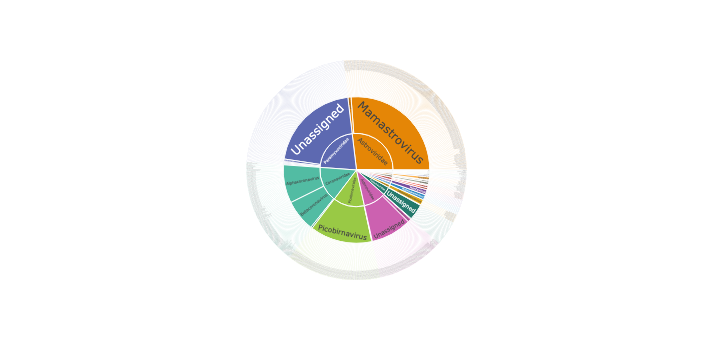

In [138]:
fig = px.sunburst(sp_count, path=ranks, 
                  color_discrete_sequence=px.colors.qualitative.Vivid)
fig.write_html('spillover1.sunburst.html', auto_open=True)

fig.show()

## Read in ICTV Master Species List Info

In [61]:
# all MSL
msl_csv = 'from-farm/all-msl.csv'
msl = pd.read_csv(msl_csv)
msl.tail()

,msl_name,lineage
104295,MSL30,;;;;;;;;Unassigned;;Virgaviridae;;Tobamovirus;...
104296,MSL30,;;;;;;;;Unassigned;;Virgaviridae;;Tobamovirus;...
104297,MSL30,;;;;;;;;Unassigned;;Virgaviridae;;Tobravirus;;...
104298,MSL30,;;;;;;;;Unassigned;;Virgaviridae;;Tobravirus;;...
104299,MSL30,;;;;;;;;Unassigned;;Virgaviridae;;Tobravirus;;...


In [100]:
msl['msl_name'].unique()

array(['MSL38.v3', 'MSL38.v2', 'MSL38.v1', 'MSL37.v3', 'MSL37.v2',
       'MSL37.v1', 'MSL36', 'MSL35', 'MSL34', 'MSL33', 'MSL32', 'MSL31',
       'MSL30'], dtype=object)

In [109]:
msl30 = msl[msl['msl_name'] == 'MSL30']
msl30.shape

(3704, 2)

In [110]:
tax_ranks = [ # superkingdom
        'realm', 'subrealm', 'kingdom',
        'subkingdom', 'phylum', 'subphylum', 'class', 'subclass', 'order',
        'suborder', 'family', 'subfamily', 'genus', 'subgenus', 'species'
    ]
msl30_ranks = [
        'order','family', 'subfamily', 'genus', 'species'
    ]
drop_ranks = [r for r in tax_ranks if r not in msl30_ranks]

In [111]:
def split_lineage_column(df, lineage_column="lineage", ranks=tax_ranks):

    # Split the lineage column
    split_df = df[lineage_column].str.split(';', expand=True)

    # Assign the new column names
    for i, col_name in enumerate(tax_ranks):
        if i < len(split_df.columns):
            df[col_name] = split_df[i]
        else:
            df[col_name] = None  # Assign None if there are fewer elements than tax ranks

    return df

In [112]:
msl30s = split_lineage_column(msl30.copy())
msl30s.head()

,msl_name,lineage,realm,subrealm,kingdom,subkingdom,phylum,subphylum,class,subclass,order,suborder,family,subfamily,genus,subgenus,species
100596,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,,,,,,,,,Caudovirales,,Myoviridae,Eucampyvirinae,Cp220virus,,Campylobacter virus CP21
100597,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,,,,,,,,,Caudovirales,,Myoviridae,Eucampyvirinae,Cp220virus,,Campylobacter virus CP220
100598,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,,,,,,,,,Caudovirales,,Myoviridae,Eucampyvirinae,Cp220virus,,Campylobacter virus CPt10
100599,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,,,,,,,,,Caudovirales,,Myoviridae,Eucampyvirinae,Cp220virus,,Campylobacter virus IBB35
100600,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,,,,,,,,,Caudovirales,,Myoviridae,Eucampyvirinae,Cp8virus,,Campylobacter virus CP81


In [113]:
# drop columns that are irrelevant for this msl
ms = msl30s.drop(columns=drop_ranks, axis=1)
ms = ms.fillna('NA') # appease plotly
ms = ms.replace('', 'NA') # appease plotly
ms.head()

,msl_name,lineage,order,family,subfamily,genus,species
100596,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CP21
100597,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CP220
100598,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CPt10
100599,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus IBB35
100600,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,Caudovirales,Myoviridae,Eucampyvirinae,Cp8virus,Campylobacter virus CP81


In [114]:
# make family-genus-species column that can be matched with MSL
ms['fgs'] =  ms['family'] + ';' + ms['genus'] + ';' + ms['species']
ms.head()

,msl_name,lineage,order,family,subfamily,genus,species,fgs
100596,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CP21,Myoviridae;Cp220virus;Campylobacter virus CP21
100597,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CP220,Myoviridae;Cp220virus;Campylobacter virus CP220
100598,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CPt10,Myoviridae;Cp220virus;Campylobacter virus CPt10
100599,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus IBB35,Myoviridae;Cp220virus;Campylobacter virus IBB35
100600,MSL30,;;;;;;;;Caudovirales;;Myoviridae;Eucampyvirina...,Caudovirales,Myoviridae,Eucampyvirinae,Cp8virus,Campylobacter virus CP81,Myoviridae;Cp8virus;Campylobacter virus CP81


## Check which members of the MSL are included in SpillOver


In [115]:
ms['in_spillover'] = ms['fgs'].apply(lambda x: x in unique_fgs)
ms['in_spillover'].value_counts()

in_spillover
False    3636
True       68
Name: count, dtype: int64

In [116]:
#huh. ok let's just look at family then

ms['in_spillover'] = ms['family'].apply(lambda x: x in taxD['family'].tolist())
ms['in_spillover'].value_counts()

in_spillover
False    2725
True      979
Name: count, dtype: int64

In [120]:
counts = ms.groupby(msl30_ranks+ ['in_spillover']).size().reset_index(name='count')
counts.head()

,order,family,subfamily,genus,species,in_spillover,count
0,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CP21,False,1
1,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CP220,False,1
2,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CPt10,False,1
3,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus IBB35,False,1
4,Caudovirales,Myoviridae,Eucampyvirinae,Cp8virus,Campylobacter virus CP81,False,1


In [121]:
msl30_ranks

['order', 'family', 'subfamily', 'genus', 'species']

In [122]:
counts.head()

,order,family,subfamily,genus,species,in_spillover,count
0,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CP21,False,1
1,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CP220,False,1
2,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus CPt10,False,1
3,Caudovirales,Myoviridae,Eucampyvirinae,Cp220virus,Campylobacter virus IBB35,False,1
4,Caudovirales,Myoviridae,Eucampyvirinae,Cp8virus,Campylobacter virus CP81,False,1


In [123]:
counts['family'].nunique()

112

In [124]:
counts['species'].nunique()

3704

### Plot

In [132]:
# color code by in_spillover
palette = px.colors.qualitative.Plotly
spillover_fgs = set(taxD['family'].tolist() + taxD['genus'].tolist() + taxD['species'].tolist())
color_map = {True: palette[i % len(palette)] for i in range(len(counts))}
color_map[False] = 'blue'
color_map[False] = 'gray'

In [134]:
counts_sorted = counts.sort_values(by='in_spillover')#, ascending=True)  # Replace 'column_name' with the name of your column


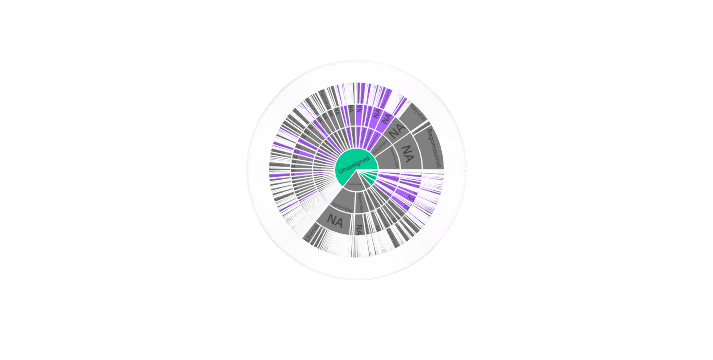

In [135]:
fig = px.sunburst(counts_sorted, path=msl30_ranks, 
                  color='in_spillover', 
                  color_discrete_map=color_map)

fig.show()

In [125]:


fig = px.sunburst(counts, path=msl30_ranks, values='count',
                 color_discrete_sequence=px.colors.qualitative.Set3)
fig.write_html('spillover.msl30.sunburst.html', auto_open=True)
#fig.show()
#fig.show(renderer='iframe')